In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from slearn import *

In [2]:
time_series = pd.read_csv("Amazon.csv")
ts = time_series.Close.values
# ts = [np.sin(0.05*i) for i in range(1000)]

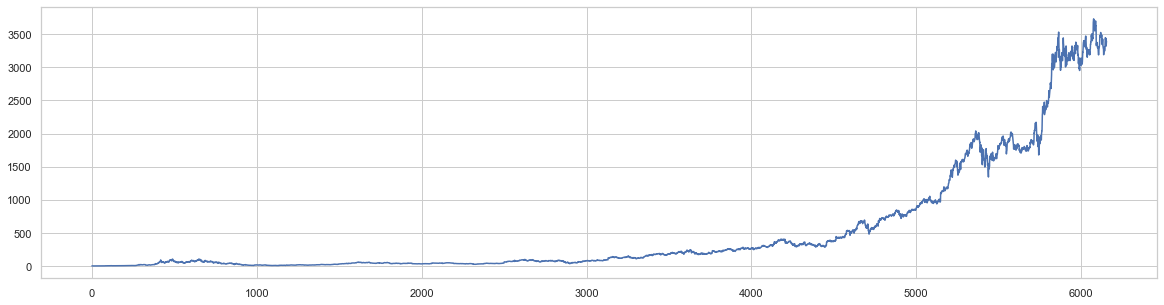

In [3]:
plt.figure(figsize=(20, 5))
sns.set_theme(style="whitegrid")
sns.lineplot(data=ts)
plt.show()

In [4]:
step = 100 # predict 30 symbolss

In [5]:
sl = slearn(series=ts, method='ABBA', 
            ws=10, step=step,
            tol=0.01, alpha=0.3, 
            form='numeric', classifier_name="GaussianNB",
            random_seed=1, verbose=1)
sklearn_params = {'var_smoothing':0.001}
abba_nb_pred = sl.predict(**sklearn_params)

2021-11-26 20:21:35,888;INFO;Digitization: Reduced pieces of length 77 to 16  symbols


-------- Config --------
The length of time series:  6155
The number of symbols:  77
The dimension of features is:  10
The number of symbols to be predicted:  100
The parameters of classifiers:  {'var_smoothing': 0.001}


/home/research/xinyechen/Paper work/slearn/slearn/slearn/slearn.py:191: UserWarning: fail to set_random_state.
  warnings.warn("fail to set_random_state.")


In [6]:
sl = slearn(series=ts, method='ABBA',
            ws=10, step=step,
            tol=0.01, alpha=0.3, 
            form='numeric', classifier_name="MLPClassifier",
            random_seed=1, verbose=1)
sklearn_params = {'hidden_layer_sizes':(20,80), 'learning_rate_init':0.01, 'random_state':0}
abba_nn_pred = sl.predict(**sklearn_params)

2021-11-26 20:21:36,351;INFO;Digitization: Reduced pieces of length 77 to 16  symbols


-------- Config --------
The length of time series:  6155
The number of symbols:  77
The dimension of features is:  10
The number of symbols to be predicted:  100
The parameters of classifiers:  {'hidden_layer_sizes': (20, 80), 'learning_rate_init': 0.01, 'random_state': 0}


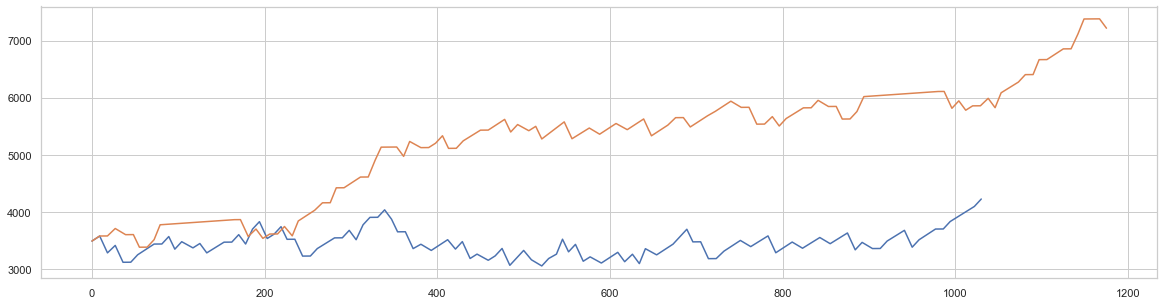

In [7]:
plt.figure(figsize=(20, 5))
sns.set_theme(style="whitegrid")
sns.lineplot(data=abba_nb_pred)
sns.lineplot(data=abba_nn_pred)
plt.show()

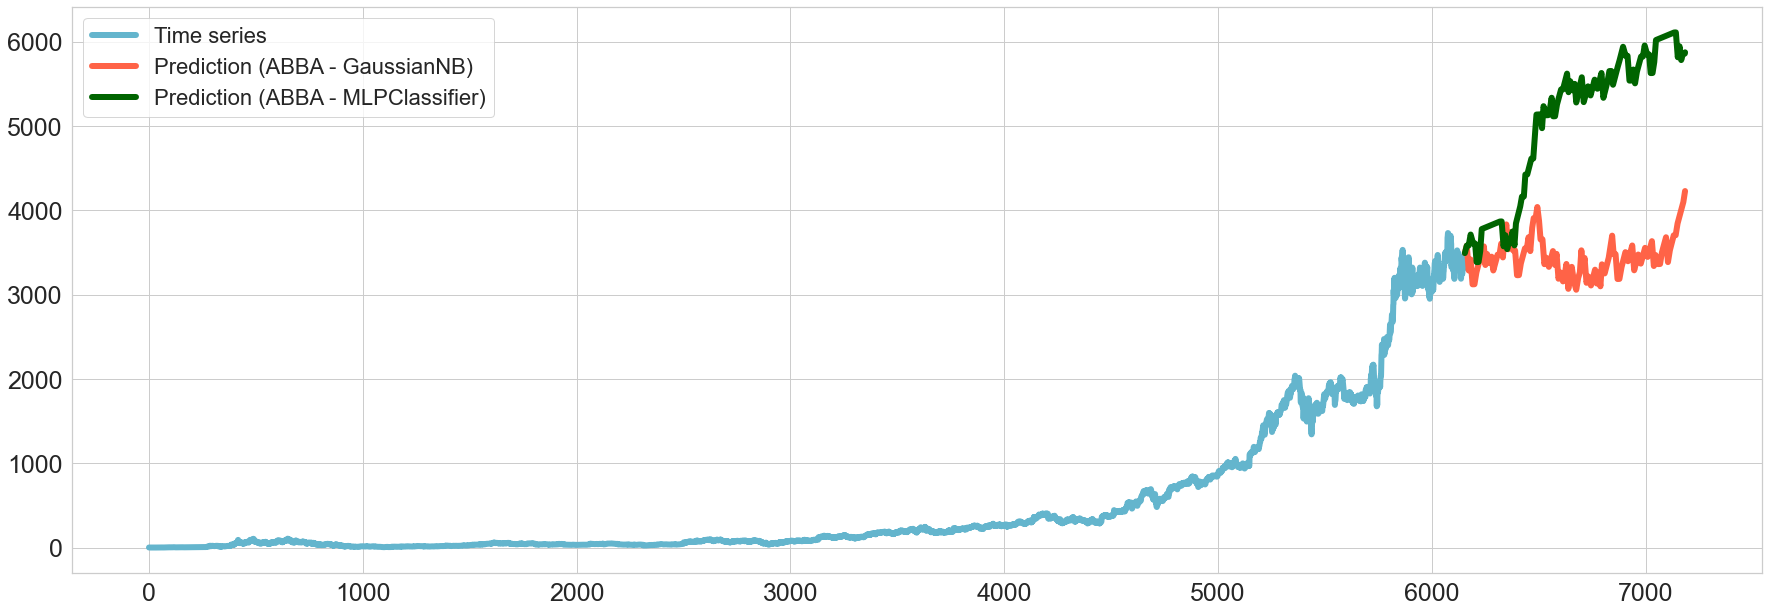

In [8]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(25, 9))

min_len = np.min([len(abba_nb_pred), len(abba_nn_pred)])
sns.set(font_scale=2, style="whitegrid")
sns.lineplot(x=np.arange(0, len(ts)), y= ts, color='c', linewidth=6, label='Time series')
sns.lineplot(x=np.arange(len(ts), len(ts)+min_len), y=abba_nb_pred[:min_len], color='tomato', linewidth=6, label='Prediction (ABBA - GaussianNB)')
sns.lineplot(x=np.arange(len(ts), len(ts)+min_len), y=abba_nn_pred[:min_len], color='darkgreen', linewidth=6, label='Prediction (ABBA - MLPClassifier)')
plt.tight_layout()
plt.tick_params(axis='both', labelsize=25)
plt.savefig("demo.PNG")
plt.show()